In [26]:
 %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [27]:
#Name of csv file
data = '../Resources/database.csv'

In [31]:
# The correct encoding must be used to read the CSV in pandas
df = pd.read_csv(data, encoding="ISO-8859-1")
df

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,198532,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1990,February,1,Murder or Manslaughter,...,Unknown,Male,49,White,Unknown,Girlfriend,Handgun,0,0,FBI
1,198533,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1990,April,1,Murder or Manslaughter,...,Unknown,Male,18,White,Unknown,Stranger,Handgun,0,1,FBI
2,198534,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1990,April,2,Murder or Manslaughter,...,Unknown,Male,28,Native American/Alaska Native,Unknown,Girlfriend,Blunt Object,0,0,FBI
3,198535,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1990,June,1,Murder or Manslaughter,...,Unknown,Male,21,Native American/Alaska Native,Unknown,Stranger,Blunt Object,0,0,FBI
4,198536,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1990,August,1,Murder or Manslaughter,...,Unknown,Male,21,White,Unknown,Acquaintance,Handgun,0,0,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439918,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,...,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
439919,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI
439920,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
439921,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI


In [7]:
# Display an overview of the Year column
df['Year'].value_counts()

1993    24335
1992    23793
1994    23246
1991    22657
1990    21246
1995    21179
1996    18969
1997    17794
2007    17303
2006    17275
2005    16836
2003    16512
2002    16268
2004    16233
1998    16061
2009    15840
2001    15803
2008    15595
2010    15121
2012    15033
2011    14756
2000    14671
1999    14621
2013    14445
2014    14331
Name: Year, dtype: int64

In [8]:
df0 = df[['Year','Month']]
df1 = df0.groupby(['Year']).count()
df1

df1 = df1.rename(columns={"Month": "MurderCount"})

In [9]:
df1 = df1.reset_index()
df1.head()

,Year,MurderCount
0,1990,21246
1,1991,22657
2,1992,23793
3,1993,24335
4,1994,23246


In [8]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this
X = df1.Year.values.reshape(-1, 1)
y = df1.MurderCount.values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)
X

Shape:  (25, 1) (25, 1)


array([[1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014]])

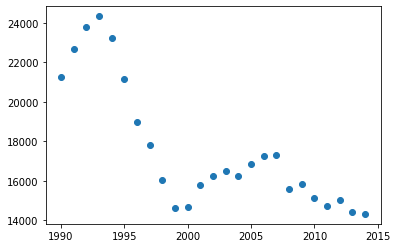

In [9]:
# Plot the data
plt.scatter(X, y)

In [10]:
#LINEAR REGRESSION
# Create the model and fit the model to the data
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
 # Print the coefficient and the intercept for the model
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-351.43153846]]
y-axis intercept:  [721162.86]


In [13]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1990]]
Max X Value: [[2014]]


In [14]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
y_min = model.predict(x_min)
y_max = model.predict(x_max)

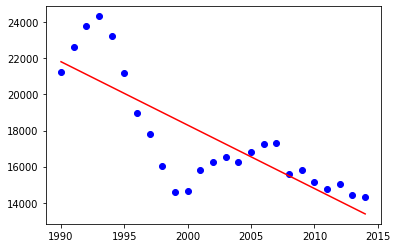

In [15]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [16]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X[:,0], y[:,0])

In [17]:
print("r-squared:", r_value**2)

r-squared: 0.6515653416403415


In [56]:
df0 = df[['Year','Month']]
#df0
df2 = df0.groupby(['Year','Month']).size().reset_index(name='counts')

d = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July': '07', 'August': '08', 'September': '09', 'October': '10', 'November': '11', 'December': '12'}
df2['Month'] = df2['Month'].map(d)

df2.sort_values(by=['Year','Month'], inplace=True)
df2

,Year,Month,counts
4,1990,01,1793
3,1990,02,1568
7,1990,03,1732
0,1990,04,1611
8,1990,05,1783
...,...,...,...
289,2014,08,1292
299,2014,09,1182
298,2014,10,1265
297,2014,11,1178


In [57]:
#Concatenate Month and Year
df2['date'] = df2['Year'].map(str)+df2['Month'].map(str)
df2['date'] = pd.to_numeric(df2['date'])
#df2['date'] = pd.to_datetime(df2['date'], format='%m-%Y').dt.strftime('%m-%Y')
df2.drop(columns=['Year','Month'], inplace=True)
df2

,counts,date
4,1793,199001
3,1568,199002
7,1732,199003
0,1611,199004
8,1783,199005
...,...,...
289,1292,201408
299,1182,201409
298,1265,201410
297,1178,201411


In [58]:
#LINEAR REGRESSION
# Create the model and fit the model to the data
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [59]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this
X = df2.date.values.reshape(-1, 1)
y = df2.counts.values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)
X

Shape:  (300, 1) (300, 1)


array([[199001],
       [199002],
       [199003],
       [199004],
       [199005],
       [199006],
       [199007],
       [199008],
       [199009],
       [199010],
       [199011],
       [199012],
       [199101],
       [199102],
       [199103],
       [199104],
       [199105],
       [199106],
       [199107],
       [199108],
       [199109],
       [199110],
       [199111],
       [199112],
       [199201],
       [199202],
       [199203],
       [199204],
       [199205],
       [199206],
       [199207],
       [199208],
       [199209],
       [199210],
       [199211],
       [199212],
       [199301],
       [199302],
       [199303],
       [199304],
       [199305],
       [199306],
       [199307],
       [199308],
       [199309],
       [199310],
       [199311],
       [199312],
       [199401],
       [199402],
       [199403],
       [199404],
       [199405],
       [199406],
       [199407],
       [199408],
       [199409],
       [199410],
       [199411

In [60]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.
model1.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
# Print the coefficient and the intercept for the model
print('Weight coefficients: ', model1.coef_)
print('y-axis intercept: ', model1.intercept_)

Weight coefficients:  [[-0.29253559]]
y-axis intercept:  [60033.93614409]


In [63]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[199001]]
Max X Value: [[201412]]


In [65]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
y_min = model1.predict(x_min)
y_max = model1.predict(x_max)

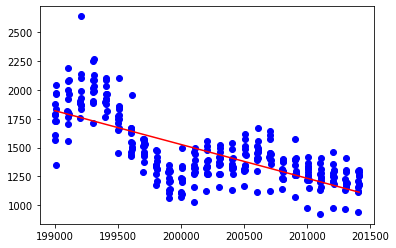

In [66]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')